<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/HeapXBucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [10]:
# -----------------------  Heap Sort In Place  ------------------------#

def buildMaxHeap(array, s):
    for n in range((s - 1)//2, -1, -1):
        maxHeapify(array, n, s)

def MAX(array, n, s):
    largest = n
    left = 2 * n + 1
    right = 2 * n + 2
    if left < s and array[n] < array[left]:
        largest = left
    if right < s and array[largest] < array[right]:
        largest = right
    return largest

def maxHeapify(array, n, s):
    c = MAX(array, n, s)
    while c < s and array[n] < array[c]:
        array[n], array[c] = array[c], array[n]
        n = c
        c = MAX(array, n, s)

def heap_sort_in_place(array):
    s = len(array)
    buildMaxHeap(array, s)
    for i in range(s-1, 0, -1):
        array[i], array[0] = array[0], array[i]
        maxHeapify(array, 0, i)
    return array
  
# -----------------------  Heap Sort Not In Place  ------------------------#

def heap_sort_not_in_place(array):
    heap = []
    for value in array:
        add(heap, value)
    order = []
    while heap:
        order.append(remove(heap))
    return order

def add(heap, item):
    heap.append(item)
    siftdown(heap, 0, len(heap)-1)

def remove(heap):
    lastValue = heap.pop()
    if heap:
        firstValue = heap[0]
        heap[0] = lastValue
        siftup(heap, 0)
        return firstValue
    return lastValue

def siftdown(heap, i, n):
    newvalue = heap[n]
    while n > i:
        parentpos = (n - 1) // 2
        parent = heap[parentpos]
        if newvalue < parent:
            heap[n] = parent
            n = parentpos
            continue
        break
    heap[n] = newvalue

def siftup(heap, p):
    size = len(heap)
    i = p
    newvalue = heap[p]
    childp = 2*p + 1
    while childp < size:
        rightp = childp + 1
        if rightp < size and not heap[childp] < heap[rightp]:
            childp = rightp
        heap[p] = heap[childp]
        p = childp
        childp = 2*p + 1
    heap[p] = newvalue
    siftdown(heap, i, p)

# -----------------------  Bucket Sort  ------------------------#

def bucket_sort(array):
    max_value = max(array)
    array_count = [0]*(max_value+1)
    for value in array:
        array_count[value]+=1
    order = []
    for i, qtd in enumerate(array_count):
        order += [i]*qtd
    return order


# -----------------------  Merge Sort  ------------------------#

def merge(array, left_array, right_array):
    li = 0
    ri = 0
    for index in range(0, len(array)):
        if li >= len(left_array):
            array[index] = right_array[ri]
            ri += 1
        elif ri >= len(right_array):
            array[index] = left_array[li]
            li += 1
        elif left_array[li] < right_array[ri]:
            array[index] = left_array[li]
            li += 1
        else:
            array[index] = right_array[ri]
            ri += 1

def merge_sort(array):
    if len(array) <= 1: return
    left_array = array[:len(array)//2]
    right_array = array[len(array)//2:]
    merge_sort(left_array)
    merge_sort(right_array)
    merge(array, left_array, right_array)
    return array

def hoares_partition(array, i, j):
    l = i
    p = j
    r = j-1
    while l<=r:
        while l<=r and array[l]<array[p]:
            l += 1
        while l<=r and array[r]>array[p]:
            r -= 1
        if l<= r:
            array[l],array[r]=array[r],array[l]
            l+=1
            r-=1
    array[l], array[p] = array[p], array[l]
    return l

def quicksort_hoares(array, i, j):
    if i>=j: return
    l = hoares_partition(array,i,j)
    quicksort_hoares(array, i, l-1) # Sem o For precisa do -1
    quicksort_hoares(array, l+1, j)

def quick_sort_hoares(array):
    quicksort_hoares(array, 0, len(array)-1)
    return array



  

Coleta de dados dos experimentos

In [11]:
import time
from numpy import random
DOMAIN = 10000 ##Você deve escolher um valor mais adequado
def avg_time(domain, tam, func, rounds, test = False): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L= list(random.randint(domain, size=tam))
    #L = [random.randint(0, domain) for _ in range(tam)]
    start = time.time()    
    S = func(L) 
    end = time.time()
    sum += end-start
    if test:
      assert S == sorted(L)
  return sum/rounds

#defines the algorithms to be processed
algorithms = [bucket_sort, heap_sort_in_place, heap_sort_not_in_place, merge_sort, quick_sort_hoares]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 5

sizes = [100000,200000,300000,400000,500000] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting experiments for datasets with size={sizes[i]}, each experiment has {num_rounds} rounds.")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds, True)
  
print(f"Finish data collection")

Starting experiments for datasets with size=100000, each experiment has 5 rounds.
Starting experiments for datasets with size=200000, each experiment has 5 rounds.
Starting experiments for datasets with size=300000, each experiment has 5 rounds.
Starting experiments for datasets with size=400000, each experiment has 5 rounds.
Starting experiments for datasets with size=500000, each experiment has 5 rounds.
Finish data collection


Formata os dados do experimento para serem exibidos

In [12]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
bucket_sort##100000,0.018071,bucket_sort,100000
heap_sort_in_place##100000,1.339589,heap_sort_in_place,100000
heap_sort_not_in_place##100000,0.810156,heap_sort_not_in_place,100000
merge_sort##100000,0.816461,merge_sort,100000
quick_sort_hoares##100000,0.482064,quick_sort_hoares,100000
bucket_sort##200000,0.035586,bucket_sort,200000
heap_sort_in_place##200000,2.929581,heap_sort_in_place,200000
heap_sort_not_in_place##200000,1.784471,heap_sort_not_in_place,200000
merge_sort##200000,1.798161,merge_sort,200000
quick_sort_hoares##200000,1.067014,quick_sort_hoares,200000


Resultado do experimento (gráfico)

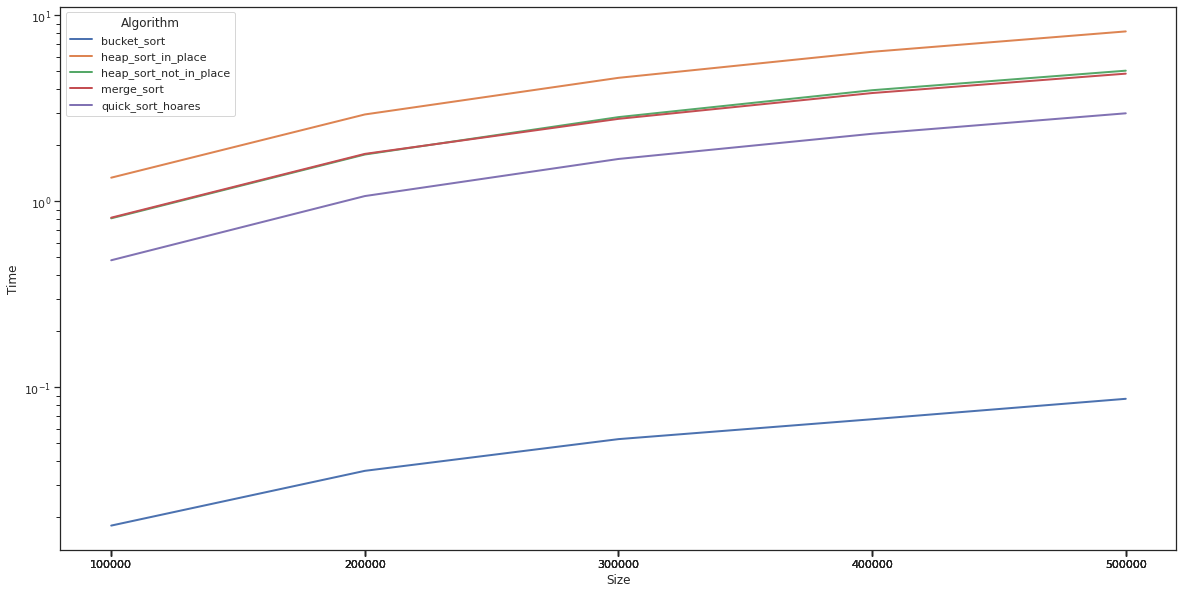

In [13]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()